# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.tail(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
1097,"Helado multipack Frugelé 18 un, 60 ml c/u",Bresler,0,4509,5499,990,congelados
1098,"Jabón barra original 3 un, de 90 g",Dove,0,2659,3659,1000,belleza-y-cuidado-personal
1099,Shampoo Fuerza Extrema 400 ml,Dove Men,0,2690,3699,1009,belleza-y-cuidado-personal
1100,Postre helado chocolate blanco frambuesa 900 ml,Magnum,0,4279,5349,1070,congelados
1101,Postre helado chocolate nuss 900 ml,Magnum,0,4279,5349,1070,congelados
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal
1106,Leche en Polvo Nido Forticrece Sin lactosa 1440g,Nido,0,14550,18899,4349,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [12]:
media_mediana = df.groupby('Categoria')['Preco_Normal'].agg(['mean','median'])
media_mediana

,mean,median
Categoria,,
belleza-y-cuidado-personal,1783.556485,1569.0
comidas-preparadas,3095.043478,3290.0
congelados,2108.042553,1519.0
frutas,1724.473684,1195.0
instantaneos-y-sopas,765.491228,439.0
lacteos,2385.219239,989.0
verduras,1343.296875,1180.0


In [19]:
print('Categorias com média acima da mediana:\n')
for i in media_mediana[media_mediana['mean'] > media_mediana['median']].index.tolist():
    print(i)
print('\nCategorias com a média abaixo da mediana:\n')
for i in media_mediana[media_mediana['mean'] < media_mediana['median']].index.tolist():
    print(i)

Categorias com média acima da mediana:

belleza-y-cuidado-personal
congelados
frutas
instantaneos-y-sopas
lacteos
verduras

Categorias com a média abaixo da mediana:

comidas-preparadas


Digite aqui as categorias:

Categorias com média acima da mediana:

belleza-y-cuidado-personal
congelados
frutas
instantaneos-y-sopas
lacteos
verduras

Categorias com a média abaixo da mediana:

comidas-preparadas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [26]:
df_desvio_padrao = df.groupby('Categoria')['Preco_Normal'].agg(['mean','median','std'])
df_desvio_padrao['diferenca_media_mediana'] = df_desvio_padrao['mean'] - df_desvio_padrao['median']
df_desvio_padrao.sort_values('std', ascending=False, inplace=True)
df_desvio_padrao

,mean,median,std,diferenca_media_mediana
Categoria,,,,
lacteos,2385.219239,989.0,3925.816164,1396.219239
belleza-y-cuidado-personal,1783.556485,1569.0,2210.041719,214.556485
congelados,2108.042553,1519.0,2111.539896,589.042553
comidas-preparadas,3095.043478,3290.0,2019.911428,-194.956522
frutas,1724.473684,1195.0,1639.151114,529.473684
instantaneos-y-sopas,765.491228,439.0,1170.232869,326.491228
verduras,1343.296875,1180.0,1012.699625,163.296875


A categoria com maior desvio padrão também apresenta o maior valor de diferença entre a média e a mediana, já a categoria com o segundo maior desvio padrão é a que mostra a menor diferença entre as duas. Isso indica que a segunda categoria com o maior desvio padrão deve ter uma distribuição que se assemelha com a normal só que "achatada".

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

<Axes: >

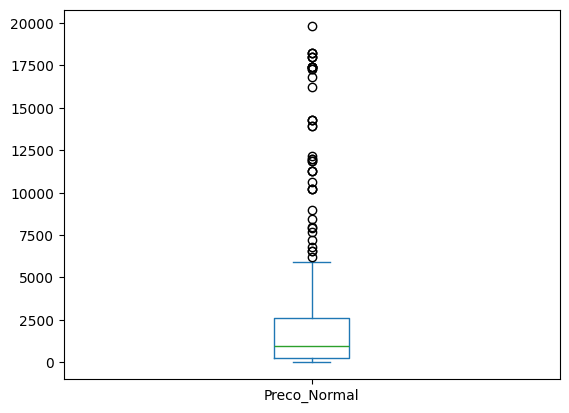

In [29]:
df[df['Categoria'] == 'lacteos']['Preco_Normal'].plot(kind = 'box')

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

<Axes: xlabel='Categoria'>

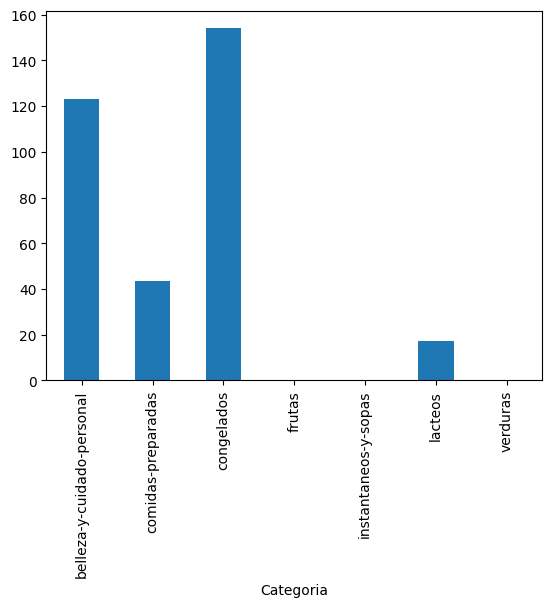

In [33]:
df.groupby('Categoria')['Desconto'].mean().plot(kind='bar')

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [38]:
df_media_desconto = df.groupby(['Categoria','Marca'])['Desconto'].mean().reset_index()

fig = px.treemap(df_media_desconto, path=['Categoria','Marca'], values='Desconto', color='Desconto')
fig.show()